## Description:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

__Business Goal__:

Main objective of the analysis is to focus on prediction of value of the price .
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. 

DATA DICTONARY:
you can see  breve descrption of the variables  in the file data dictionary

## Librery

In [1]:
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preprecessing 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("data/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploring the data and Feature engineering

In [3]:
df.info()
# we have  columns and 205 rows
# we have numerical nd no-numericals columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# car_id is a just a index we drop it
df.drop(columns=['car_ID'],axis=1,inplace=True)

In [5]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.isnull().sum()
# any missing values 

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# we can doalso this for detecting mising values if we have a large dataset
df.isnull().sum().any()

False

## Distribution 

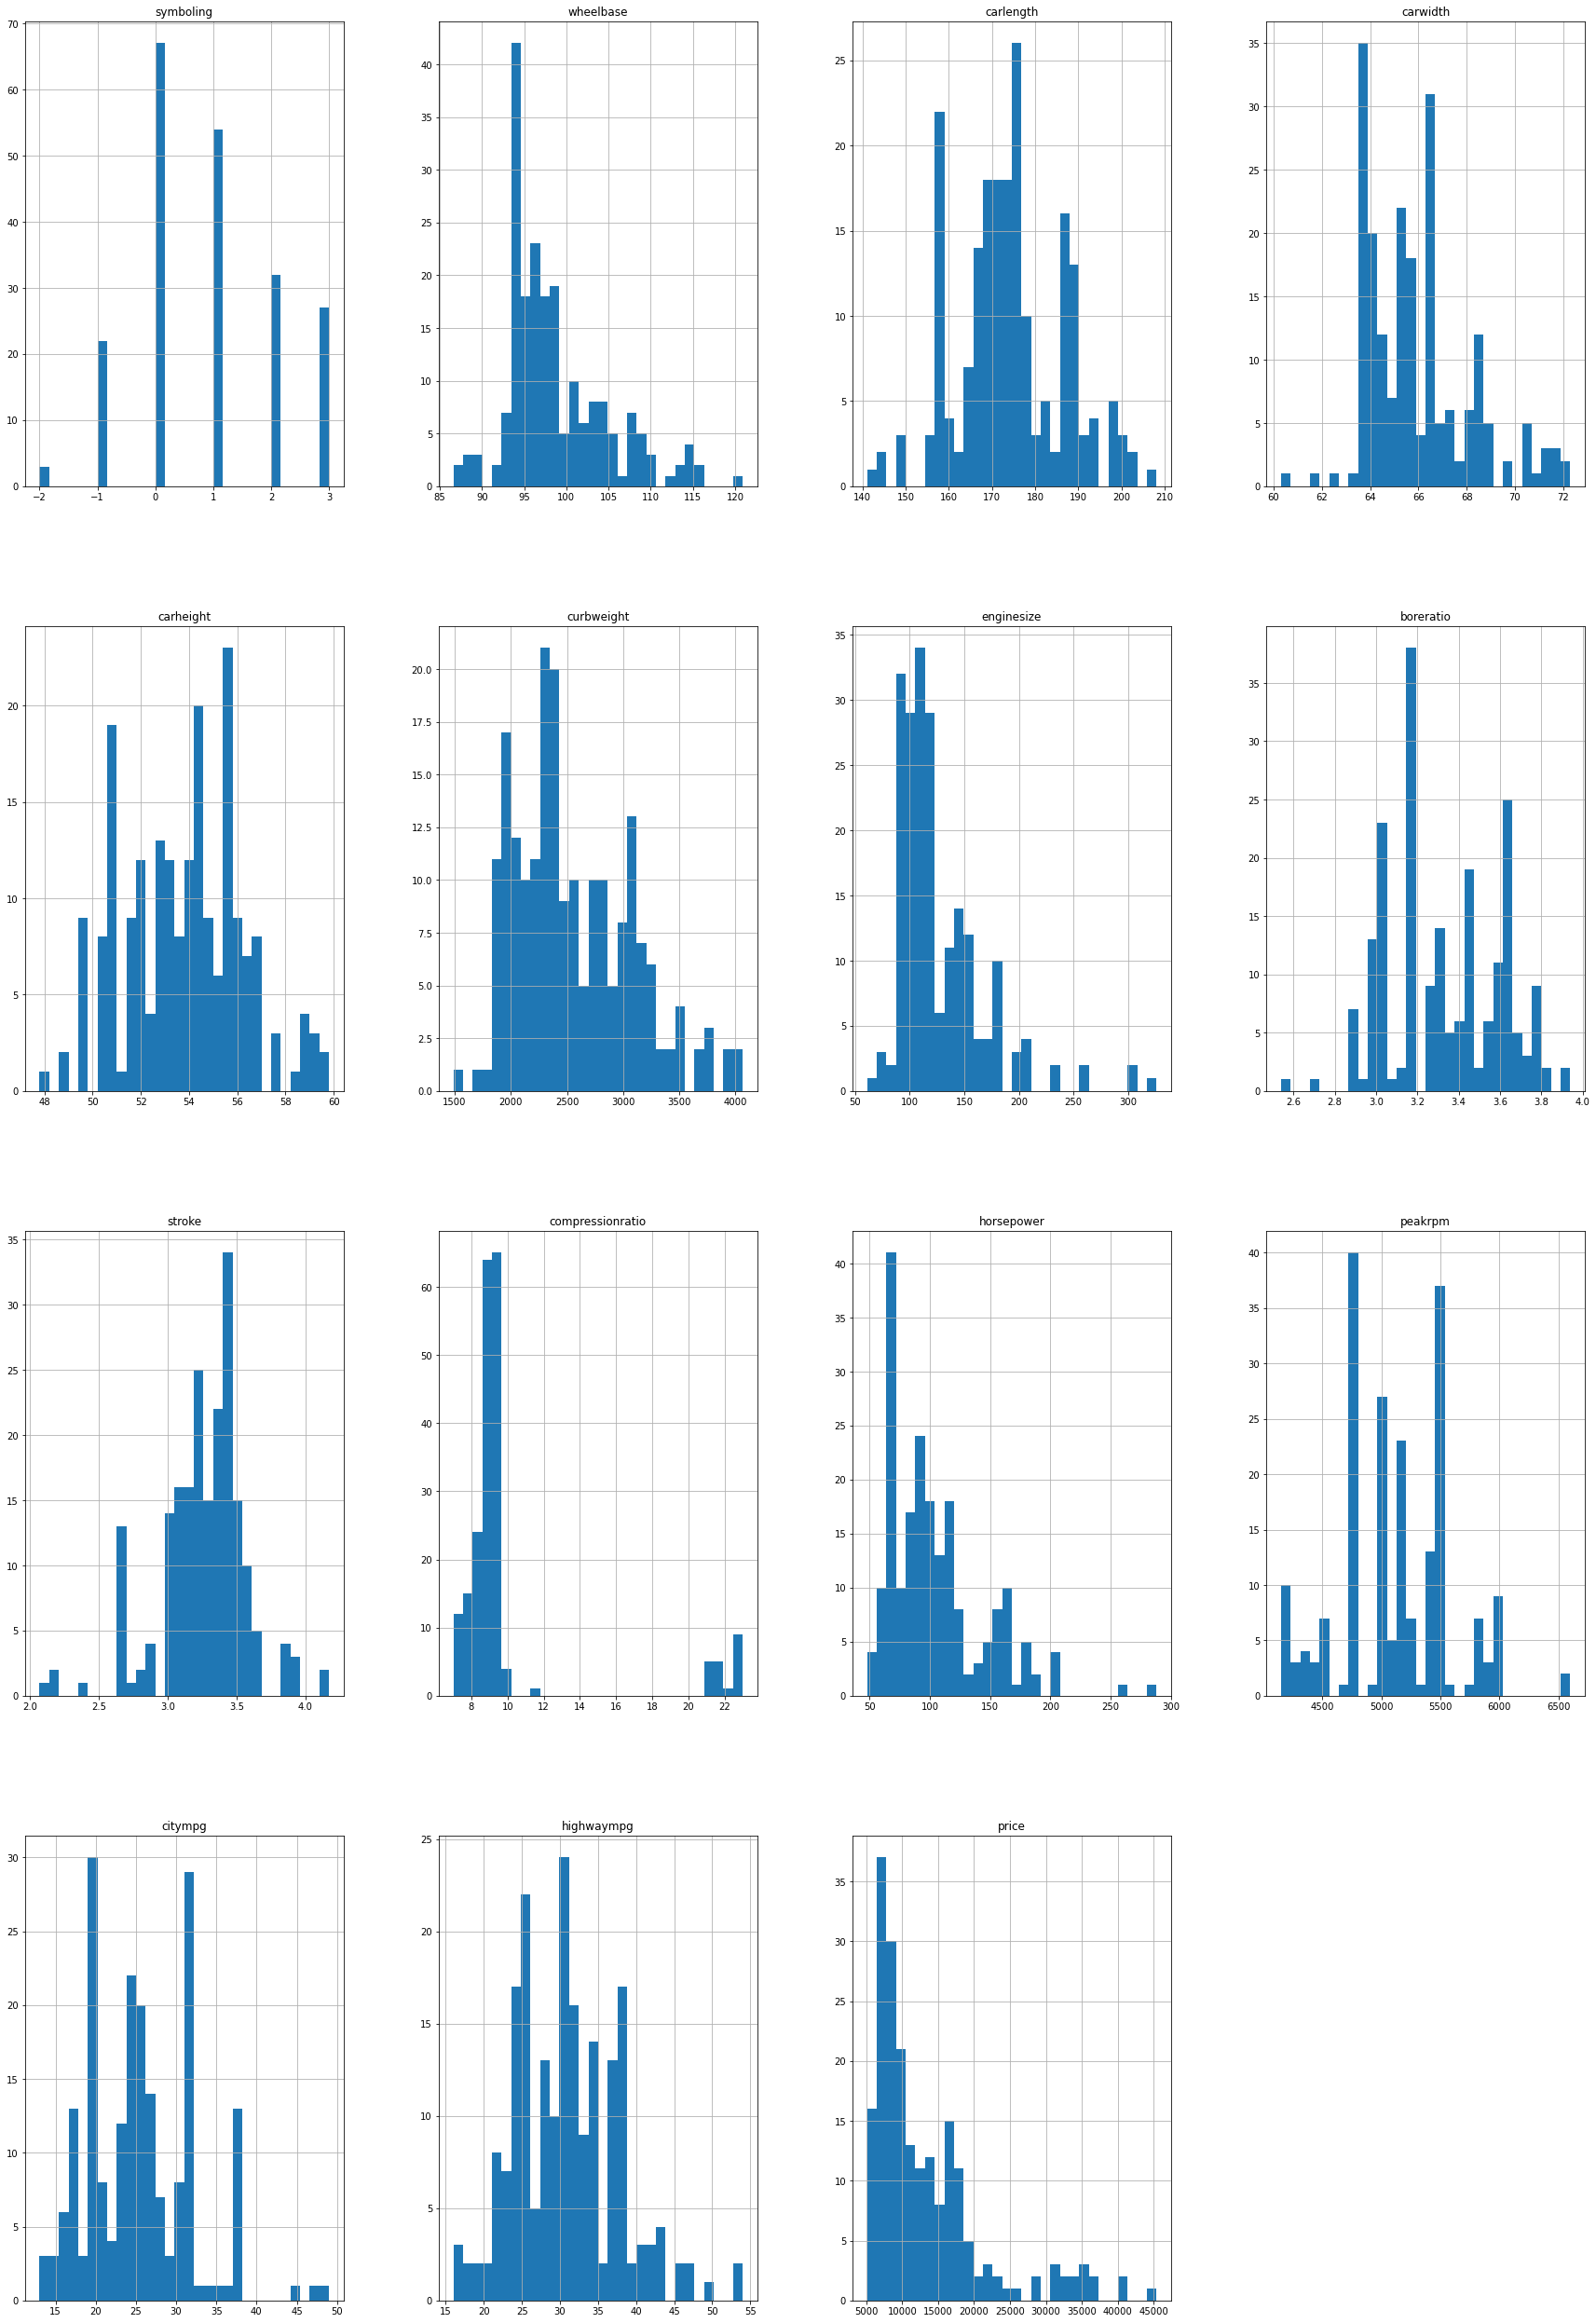

In [8]:
# let see the distribution of vars

df.hist(bins=30,figsize=(30,45))
plt.show()

## skew

In [9]:
# we have for example a right skew en var price

df_num= df.select_dtypes(exclude='object')

In [10]:
skew_vals=df_num.skew().to_frame()

In [11]:
skew_limit=0.75
skew_cols = (skew_vals
             .rename(columns={0:'Skew'})
             .query('abs(Skew)> {}'.format(skew_limit))
             .sort_values(by='Skew',ascending=False))

skew_cols

,Skew
compressionratio,2.610862
enginesize,1.947655
price,1.777678
horsepower,1.405310
wheelbase,1.050214
carwidth,0.904003


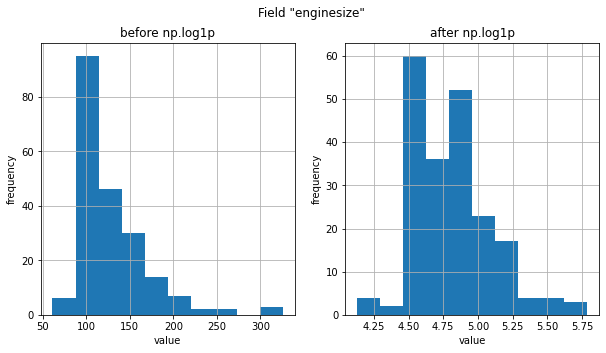

In [12]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "enginesize"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df_num[field].hist(ax=ax_before)
df_num[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

Transform all the columns where the skew is greater than 0.75, excluding "price".

In [13]:
lista = skew_cols.index.to_list()

In [14]:
lista

['compressionratio',
 'enginesize',
 'price',
 'horsepower',
 'wheelbase',
 'carwidth']

In [15]:
for col in lista:
    if col == "price":
        continue
    df_num[col] = np.log1p(df_num[col])
    

In [16]:
df_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,13495.0
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,16500.0
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,5.043425,5000,19,26,16500.0
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,4.634729,5500,24,30,13950.0
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,4.753590,5500,18,22,17450.0


## OUTLIERS

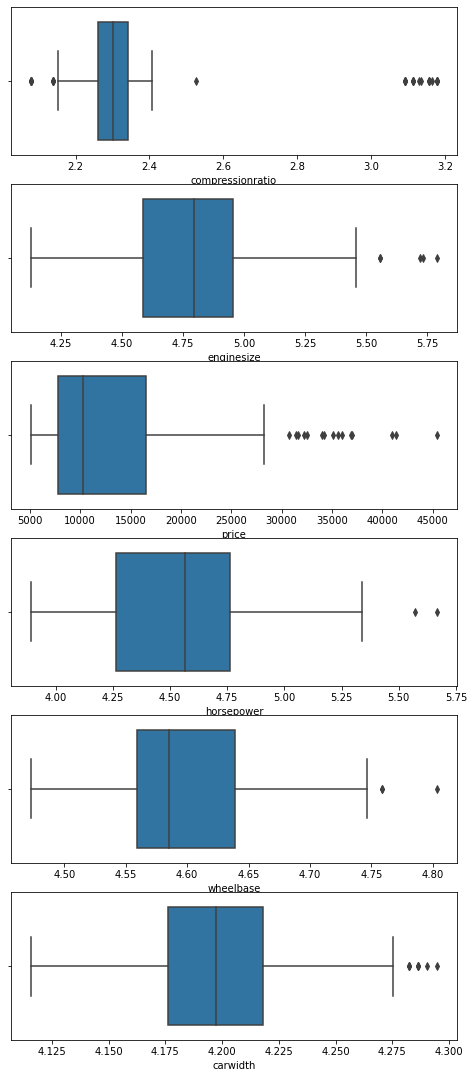

In [17]:
fig,ax=plt.subplots(figsize=(8,19),nrows=len(lista),ncols=1)
i=0
for col in lista:
    sns.boxplot(data=df_num,x=col,ax=ax[i])
    i=i+1

In [18]:
df_num.loc[df_num.horsepower>5.5][['price']]

,price
49,36000.0
129,31400.5


In [19]:
df_num.loc[df_num.wheelbase>4.75][['price']]

,price
70,31600.0
71,34184.0
73,40960.0


In [20]:
df_num.loc[df_num.carwidth>4.285][['price']]

,price
70,31600.0
71,34184.0
73,40960.0
74,45400.0
129,31400.5


In [21]:
df_num.loc[df_num.enginesize>5.5][['price']]

,price
47,32250.0
48,35550.0
49,36000.0
73,40960.0
74,45400.0


In [22]:
#drop oulieres
#df_num.drop(index=[47,48,49,73,74,70,71,129],inplace=True)

In [23]:

#df_num.skew()

## Correlation

Relationship between variables

The first step in establishing a multiple linear model is to study the relationship between variables. This information is critical in identifying which may be the best predictors for the model, and in detecting collinearity between predictors.

In [24]:
#matrix of correlation between the target and numerical vars 
np.abs(df_num.corr()['price']).sort_values(ascending=False)
# At first glance, we see that there are 9 features, they are highly correlated with the prediction value

price               1.000000
enginesize          0.846059
curbweight          0.835305
horsepower          0.788743
carwidth            0.755968
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.568669
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.050566
Name: price, dtype: float64

In [25]:
# let  see the scatter plot 
df_num_cols=df_num.columns

In [26]:
df_num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

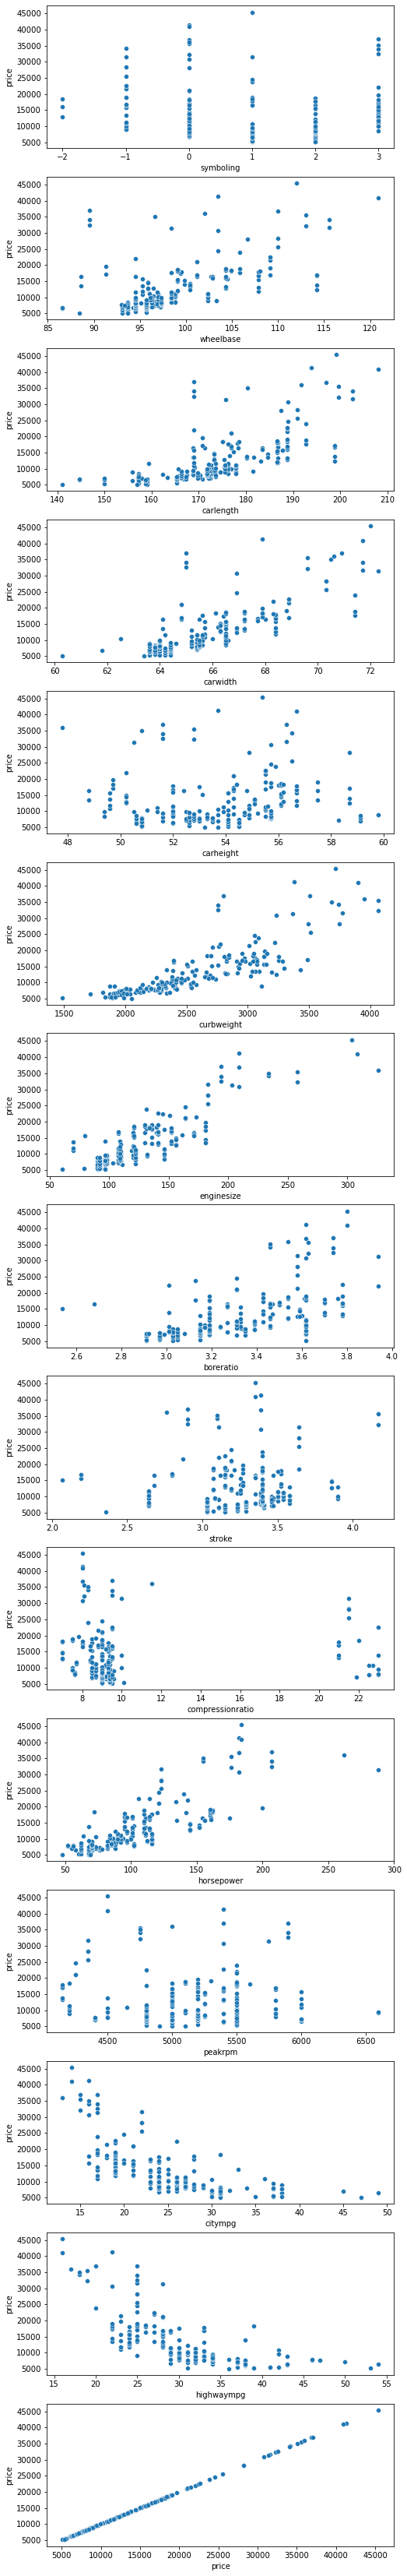

In [27]:
#plt scatterplot of numeric data


fig,ax=plt.subplots(figsize=(8,60),nrows=len(df_num_cols))
j=0
for i in df_num_cols:
   # if i!='price':
        sns.scatterplot(data=df,x=i,y='price',ax=ax[j])
    
        j=j+1


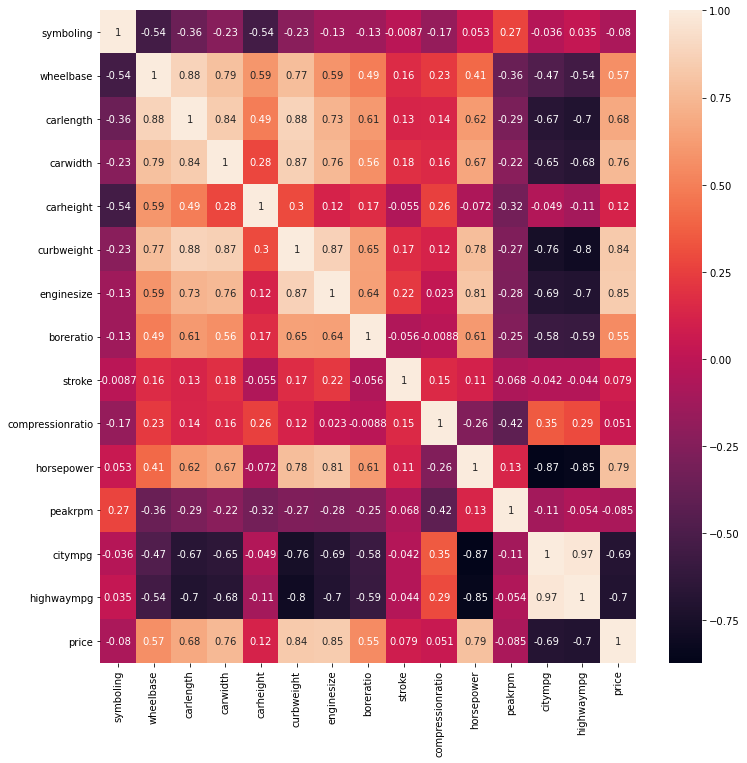

In [28]:
# let see al correlation betwwen vars
plt.figure(figsize=(12,12))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [29]:
#we can see that we have many features hight correlated 

In [30]:
# stack de variables is more intuitive to compare coeficient of correlation
df_num.corr().stack().reset_index().head()

,level_0,level_1,0
0,symboling,symboling,1.000000
1,symboling,wheelbase,-0.537480
2,symboling,carlength,-0.357612
3,symboling,carwidth,-0.232198
4,symboling,carheight,-0.541038


In [31]:
matrix_corr = df.corr().stack().reset_index()

In [32]:
matrix_corr =matrix_corr.rename(columns={0:'r'})

In [33]:
matrix_corr = matrix_corr.loc[matrix_corr.level_0 != matrix_corr.level_1]

In [34]:
matrix_corr.head(8)

,level_0,level_1,r
1,symboling,wheelbase,-0.531954
2,symboling,carlength,-0.357612
3,symboling,carwidth,-0.232919
4,symboling,carheight,-0.541038
5,symboling,curbweight,-0.227691
6,symboling,enginesize,-0.105790
7,symboling,boreratio,-0.130051
8,symboling,stroke,-0.008735


In [35]:
matrix_corr['r']=np.abs(matrix_corr.r)

In [36]:
# for display all rows 
pd.options.display.min_rows=None

In [37]:
matrix_corr=matrix_corr.sort_values(by='r',ascending=False)

In [38]:
matrix_corr.head(20)

,level_0,level_1,r
207,highwaympg,citympg,0.971337
193,citympg,highwaympg,0.971337
77,curbweight,carlength,0.877728
35,carlength,curbweight,0.877728
31,carlength,wheelbase,0.874587
17,wheelbase,carlength,0.874587
104,enginesize,price,0.874145
216,price,enginesize,0.874145
78,curbweight,carwidth,0.867032
50,carwidth,curbweight,0.867032


Many of the variables are highly correlated (absolute correlation> 0.8), which is a problem when using linear regression models.

## Categorical vars

In [39]:
# categorical vars 
df_cat= df.select_dtypes(include='object')
df_cat.shape

(205, 10)

In [40]:
df_cat.nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [41]:
#carName is not significative then we drop it 
df_cat.drop('CarName',axis=1,inplace=True
           )

In [42]:
(df_cat.nunique())
# we can apply dummies or onehot encode for tansforming categorical to dummies ,but some vars cat are ordinal

fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [43]:

df_dummies=pd.get_dummies(df_cat,drop_first=True)
df_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
#df_dummies.nunique()

In [45]:
df_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,13495.0
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,16500.0
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,5.043425,5000,19,26,16500.0
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,4.634729,5500,24,30,13950.0
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,4.753590,5500,18,22,17450.0


In [46]:
df_new= pd.concat([df_num,df_dummies],axis=1)

In [47]:
df_new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,1,0,0
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,1,0,0
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,...,0,0,0,0,0,0,0,1,0,0
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,...,0,0,0,0,0,0,0,1,0,0
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    float64
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    float64
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [49]:
df_new.to_csv('car_price.csv',index=False)

In [50]:
df_new=pd.read_csv('car_price.csv')

In [51]:
df_new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,1,0,0
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,1,0,0
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,...,0,0,0,0,0,0,0,1,0,0
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,...,0,0,0,0,0,0,0,1,0,0
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,...,0,0,0,0,0,0,0,1,0,0


# Training the model
- Train the following models: LinearRegrssion, Ridge, Lasso, RidgeCV, LassoCV, Elastic Net
- Compare r2_scores
- Compare root-mean square errors
- Plot the results: prediction vs actual

In [52]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [53]:
X=df_new.drop('price',axis=1)
Y= df_new['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=142,shuffle=True)

In [55]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(143, 43) (62, 43) (143,) (62,)


## Linear Regression OLS

In [56]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_s= s.fit_transform(X_train)
X_test_s = s.transform(X_test)


In [57]:
lm=LinearRegression()
lm.fit(X_train_s,y_train)

LinearRegression()

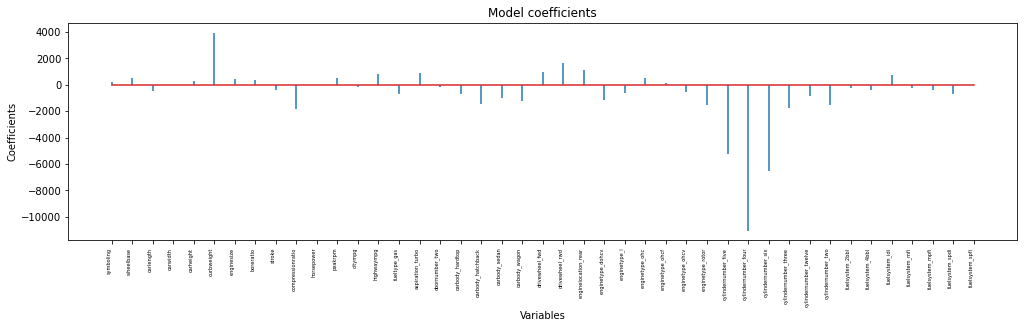

In [58]:
# model coefficients

#A stem plot plots vertical lines at each *x* location from the baseline to *y*, and places a marker there.
# ==============================================================================
df_coef = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lm.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(17,4))
ax.stem(df_coef.predictor, df_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('Model coefficients');


In [59]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lm.coef_), 
                                                               len(lm.coef_.nonzero()[0])))
print('Magnitude of LR coefficients:', abs(lm.coef_).sum())


Of 43 coefficients, 42 are non-zero with Lasso.
Magnitude of LR coefficients: 53831.817166128196


In [60]:
pred= lm.predict(X_test_s)

In [61]:
mae=mean_squared_error(y_test,pred)
print("mean squared error is: ",mae)

Rmse=np.sqrt(mae)
print("R mean squared error is: ",Rmse)
r2=r2_score(y_test,pred)
print("Coeficient R2:", r2)

mean squared error is:  16718913.431641346
R mean squared error is:  4088.8767934044363
Coeficient R2: 0.8202271356360115


In [62]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
kf = KFold(shuffle=True, random_state=72018, n_splits=4)

In [63]:
# with pipeline and cross_val_predict

estimator = Pipeline([("scaler", s),("regression", lm)])
y_pred_lr = cross_val_predict(estimator, X,Y, cv=kf)
score = r2_score(Y, y_pred_lr)
maecv=mean_squared_error(Y,y_pred_lr)
print("mean squared error is: ",maecv)

Rmsecv=np.sqrt(mae)
print("R mean squared error is: ",Rmsecv)
r2=r2_score(y_test,pred)
print("Coeficient R2:",score)

mean squared error is:  10341009.415221265
R mean squared error is:  4088.8767934044363
Coeficient R2: 0.8371762173145307




The predictions of the final model are an average of 4088 units away from the true value.

In [64]:
# we can see the hight varianze and less bias in the model because is highly correlated 

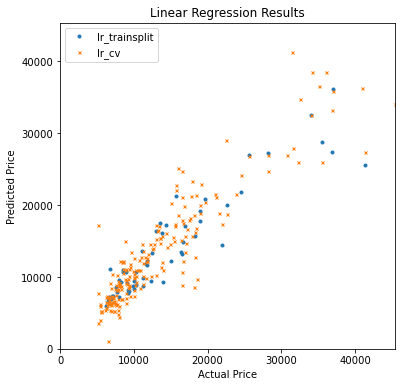

In [65]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax1=ax.plot(y_test,pred, 
         marker='o', ls='', ms=3.0,label='lr_trainsplit')

ax2=ax.plot(Y,y_pred_lr, 
         marker='x', ls='', ms=3.0,label='lr_cv')
lim = (0, Y.max())
leg = plt.legend(frameon=True)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Regularization with Ridge

In [66]:

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
#alphas = np.geomspace(4, 20, 20)

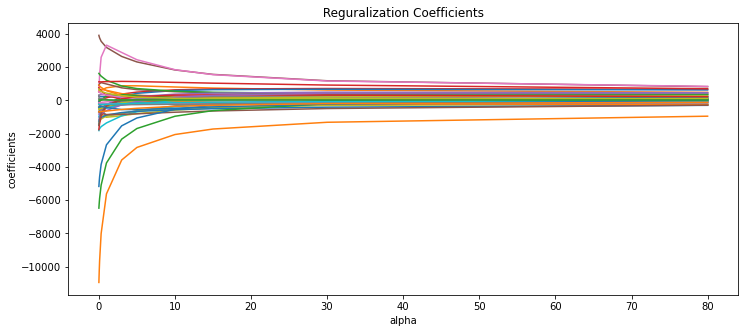

In [67]:
lista=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha,max_iter=100000)
    ridge.fit(X_train_s, y_train)
    lista.append(ridge.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(alphas, lista)

ax.set_xlabel('alpha')
ax.set_ylabel('coefficients')
ax.set_title(' Reguralization Coefficients ');
plt.axis('tight')
plt.show()

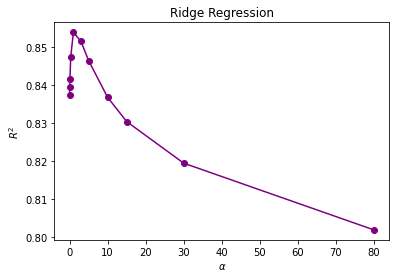

In [68]:
# rigge with cross_val_predict
scores = []
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("ridg_regression", ridge)])

    predictions = cross_val_predict(estimator, X, Y, cv = kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)
    
plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [69]:
BEST_RIDGE= Ridge(alpha=5)
BEST_RIDGE.fit(X_train_s,y_train)
y_pred_rd=BEST_RIDGE.predict(X_test_s)

In [70]:
print('Of {} coefficients, {} are non-zero with Ridge.'.format(len(BEST_RIDGE.coef_), 
                                                               len(BEST_RIDGE.coef_.nonzero()[0])))

print('Magnitude of Ridge coefficients:', abs(BEST_RIDGE.coef_).sum())



Of 43 coefficients, 42 are non-zero with Ridge.
Magnitude of Ridge coefficients: 23440.342419252458


In [71]:
df_coef_Rdge = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': BEST_RIDGE.coef_.flatten()}
                  )
df_coef_Rdge.head()

,predictor,coef
0,symboling,153.127550
1,wheelbase,879.244148
2,carlength,-138.180859
3,carwidth,500.126620
4,carheight,294.858757


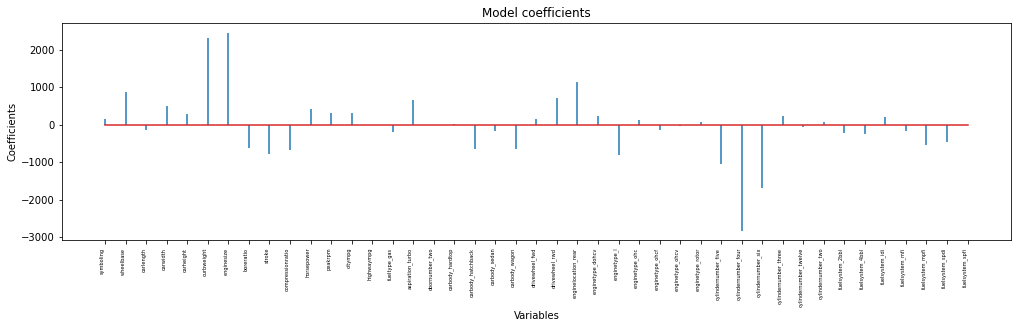

In [72]:
# model coefficients

#A stem plot plots vertical lines at each *x* location from the baseline to *y*, and places a marker there.
# ==============================================================================

fig, ax = plt.subplots(figsize=(17,4))
ax.stem(df_coef_Rdge.predictor, df_coef_Rdge.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('Model coefficients');


ridge clearly reduces the coefficients to almost zero

In [73]:
mae_rd=mean_squared_error(y_test,y_pred_rd)
print("mean squared error is: ",mae_rd)

Rmse_rd=np.sqrt(mae_rd)
print("R mean squared error is: ",Rmse_rd)
r2_rd=r2_score(y_test,y_pred_rd)
print("Coeficient R2:", r2_rd)

mean squared error is:  12915794.263073694
R mean squared error is:  3593.8550698482118
Coeficient R2: 0.8611207995243038


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# we are looking the best alpha 

param_grid = {'alpha':[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]}
model_grid = GridSearchCV(estimator= Ridge(),
                          param_grid = param_grid,
                          cv=10, verbose=0)

            

In [76]:
model_grid.fit(X_train_s,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30,
                                   80]})

In [77]:
model_grid.best_params_

{'alpha': 3}

In [78]:
pred_grid= model_grid.predict(X_test_s)

mae_gr=mean_squared_error(y_test,pred_grid)
print("mean squared error is: ",mae_gr)

Rmse_gr=np.sqrt(mae_gr)
print("R mean squared error is: ",Rmse_gr)
r2_gr=r2_score(y_test,pred_grid)
print("Coeficient R2:", r2_gr)

mean squared error is:  12344218.917372588
R mean squared error is:  3513.4340633307165
Coeficient R2: 0.8672667573652039




The predictions of ridge regression are an average of 3513 units away from the true value . We can see it is better the Lineal regression.




In [79]:
# comparing scores
pd.DataFrame([[r2,r2_gr,Rmse,Rmse_gr]],columns=['linear_r2', 'ridge_r2','ErrorLinearR','ErrorRidge'], index=['values'])

,linear_r2,ridge_r2,ErrorLinearR,ErrorRidge
values,0.820227,0.867267,4088.876793,3513.434063


## Regularization with LASSO

In [80]:
alphas = [0.003,0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
#alphas = np.geomspace(1e-10, 80, 200)

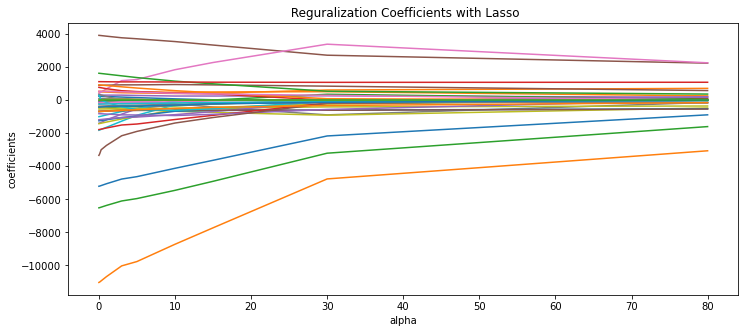

In [81]:
lista=[]
for alpha in alphas:
    las = Lasso(alpha=alpha,max_iter=100000)
    las.fit(X_train_s, y_train)
    lista.append(las.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(alphas, lista)

ax.set_xlabel('alpha')
ax.set_ylabel('coefficients')
ax.set_title(' Reguralization Coefficients with Lasso');
plt.axis('tight')
plt.show()

You can see how, as the value of alpha increases, the regularization is greater and more predictors are excluded (its coefficient is 0).

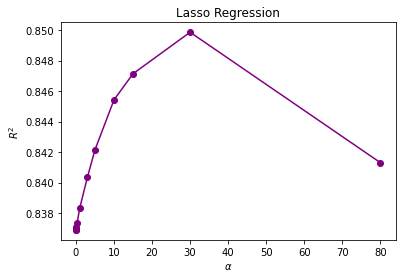

In [82]:
# rigge with cross_val_predict
scores = []
coefs = []
for alpha in alphas:
    lass = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lass_regression", lass)])

    predictions = cross_val_predict(estimator, X, Y, cv = kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)
    
plt.plot(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [83]:
max(scores)

0.8498568715779768

In [84]:
best_lasso= Lasso(alpha=30,max_iter=100000)
best_lasso.fit(X_train_s,y_train)
pred_las= best_lasso.predict(X_test_s)


In [85]:
mae_las=mean_squared_error(y_test,pred_las)
print("mean squared error is: ",mae_las)

Rmse_las=np.sqrt(mae_las)
print("R mean squared error is: ",Rmse_las)
r2_las=r2_score(y_test,pred_las)
print("Coeficient R2:", r2_las)

mean squared error is:  13224818.188829185
R mean squared error is:  3636.5943118292953
Coeficient R2: 0.857797968975703


In [86]:
print('Of {} coefficients, {} are non-zero with Ridge.'.format(len(best_lasso.coef_), 
                                                               len(best_lasso.coef_.nonzero()[0])))

print('Magnitude of Ridge coefficients:', abs(best_lasso.coef_).sum())

Of 43 coefficients, 31 are non-zero with Ridge.
Magnitude of Ridge coefficients: 26413.986687377655


__Lasso reduce 12 coefficients__

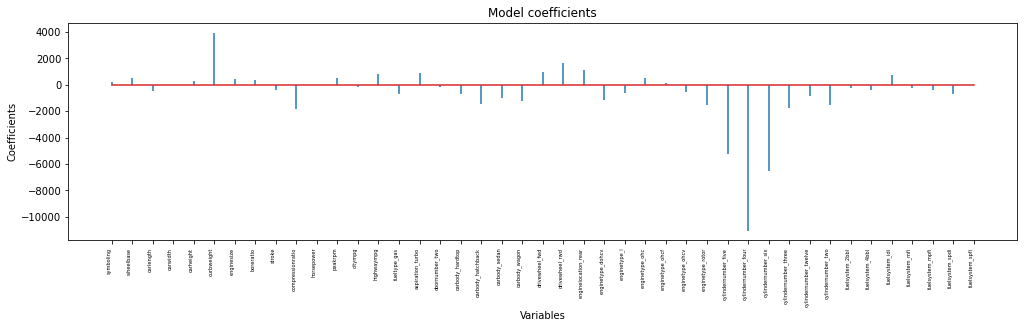

In [87]:
# model coefficients

#A stem plot plots vertical lines at each *x* location from the baseline to *y*, and places a marker there.
# ==============================================================================
df_coef_las = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': best_lasso.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(17,4))
ax.stem(df_coef.predictor, df_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('Model coefficients');


In [88]:
# comparing scores
pd.DataFrame([[r2,r2_gr,r2_las,Rmse,Rmse_gr,Rmse_las]],columns=['linear_r2', 'ridge_r2','Lasso_r2','ErrorLinearR','ErrorRidge'
                                                               ,'Errorlasso'],
             index=['values'])

,linear_r2,ridge_r2,Lasso_r2,ErrorLinearR,ErrorRidge,Errorlasso
values,0.820227,0.867267,0.857798,4088.876793,3513.434063,3636.594312


**Conclusion:** Both Lasso and Ridge with proper hyperparameter tuning give better results than plain ol' Linear Regression! but Ridge have a better result .

On the other hand, when there are highly correlated predictors (linearly), ridge reduces the influence of all of them at the same time and proportionally, while lasso tends to select one of them, giving it all the weight and excluding the rest

## Regularization with Elasticnet

In [89]:
# recordamos la formula de elastiknet usa lasso*alpha +ridge(1-aplha) asi que 0.1 tendra mas peso en ridge y 0.9 mas peso en lasso
#ELASTICNETCV
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4,cv=kf).fit(X_train_s, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test_s))
elasticNetCV_r2 = r2_score(y_test, elasticNetCV.predict(X_test_s))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse,elasticNetCV_r2)
    


0.05 0.5 3531.237988458104 0.8659181279475155


In [90]:
# comparing scores
pd.DataFrame([[r2,r2_gr,r2_las,elasticNetCV_r2,Rmse,Rmse_gr,Rmse_las,elasticNetCV_rmse]],columns=['linear_r2', 'ridge_r2','Lasso_r2','Elsaticr2','ErrorLinearR','ErrorRidge'
                                                               ,'Errorlasso','ErrorElasticnet'],
             index=['values']).T

,values
linear_r2,0.820227
ridge_r2,0.867267
Lasso_r2,0.857798
Elsaticr2,0.865918
ErrorLinearR,4088.876793
ErrorRidge,3513.434063
Errorlasso,3636.594312
ErrorElasticnet,3531.237988


__Elasticnet has ridge-like results, but tries to find the balance between ridge and lasso__

## Regularization with ElasticnetCV,LASSOCV,RIDGECV

In [91]:
#ridgeCV with 


ridgeCV = RidgeCV(alphas=alphas, 
                  cv=kf).fit(X_train_s, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_s))

ridgeCV_r2 = r2_score(y_test, ridgeCV.predict(X_test_s))

print(ridgeCV.alpha_, ridgeCV_rmse,ridgeCV_r2)

3.0 3513.4340633307165 0.8672667573652039


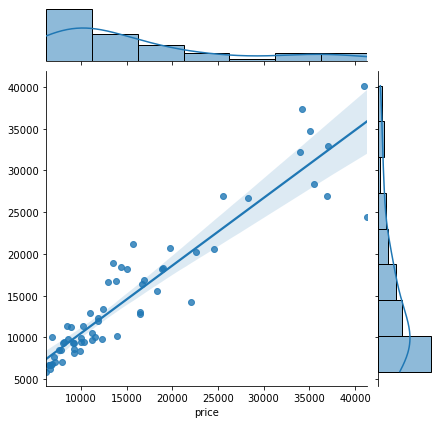

In [92]:
sns.jointplot(y_test,ridgeCV.predict(X_test_s),kind='reg')

In [93]:

#lassocv with normalization
lassoCV = LassoCV(alphas=alphas,
                  max_iter=100000,
                  cv=kf,normalize=False).fit(X_train_s, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test_s))
lassoCV_r2 = r2_score(y_test, lassoCV.predict(X_test_s))

print(lassoCV.alpha_, lassoCV_rmse,lassoCV_r2 ) 

80.0 3794.1605291028773 0.845208363196851


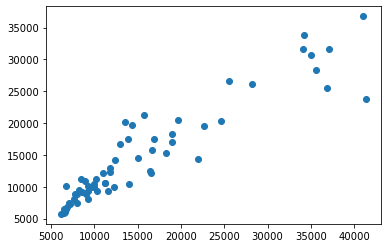

In [94]:
plt.scatter(y_test,lassoCV.predict(X_test_s))

In [95]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 43 coefficients, 25 are non-zero with Lasso.


##  Comparison between models

In [96]:
rmse_vals = [ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Ridge,3513.434063
Lasso,3794.160529
ElasticNet,3531.237988


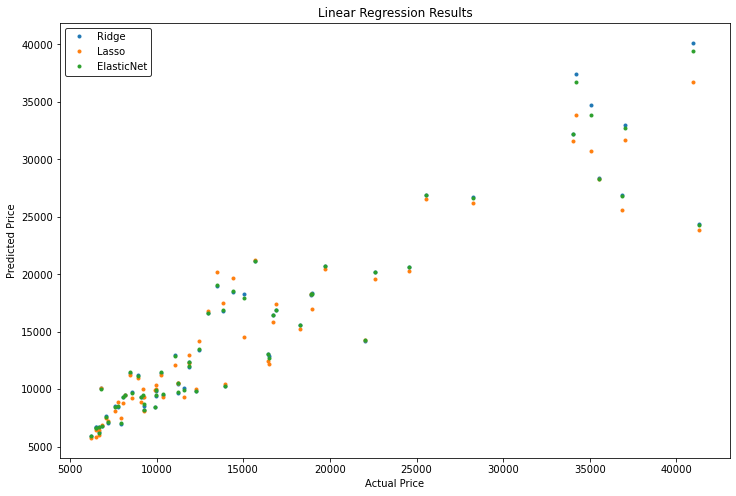

In [97]:
f = plt.figure(figsize=(12,8))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test_s), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

**Conclusion 2**: the best model is ridge, and elasticnet approaches it, which we identify that even though we have applied the regularization, and according to the graphs fit well, the Rmse is still high.

#  Next Steps

### Because the model contains many highly correlated variables, it is necessary to apply other methods of characteristic reduction, to reduce the variance without increasing the bias and then apply gridserach again to find the best parameters defined in our dictionary.